# **Dimensionality Reduction Techniques in R**
## **Methods Used:**
* Principal Component Analysis (PCA)
* Linear Discriminant Analysis (LDA)
* Quadratic Discriminant Analysis (QDA) 
* Kernel PCA

Both PCA and LDA are linear transformation techniques. However, PCA is an unsupervised while LDA is a supervised dimensionality reduction technique.

PCA has no concern with the class labels. In simple words, PCA summarizes the feature set without relying on the output. PCA tries to find the directions of the maximum variance in the dataset. In a large feature set, there are many features that are merely duplicate of the other features or have a high correlation with the other features. Such features are basically redundant and can be ignored. The role of PCA is to find such highly correlated or duplicate features and to come up with a new feature set where there is minimum correlation between the features or in other words feature set with maximum variance between the features. Since the variance between the features doesn't depend upon the output, therefore PCA doesn't take the output labels into account.

Unlike PCA, LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes. LDA tries to find a decision boundary around each cluster of a class. It then projects the data points to new dimensions in a way that the clusters are as separate from each other as possible and the individual elements within a cluster are as close to the centroid of the cluster as possible. The new dimensions are ranked on the basis of their ability to maximize the distance between the clusters and minimize the distance between the data points within a cluster and their centroids. These new dimensions form the linear discriminants of the feature set.

**PCA vs LDA: What to Choose for Dimensionality Reduction?**

In case of uniformly distributed data, LDA almost always performs better than PCA. However if the data is highly skewed (irregularly distributed) then it is advised to use PCA since LDA can be biased towards the majority class.

Finally, it is beneficial that PCA can be applied to labeled as well as unlabeled data since it doesn't rely on the output labels. On the other hand, LDA requires output classes for finding linear discriminants and hence requires labeled data.

**Quadratic discriminant analysis (QDA)**

Quadratic discriminant analysis is a method you can use when you have a set of predictor variables and you’d like to classify a response variable into two or more classes. It is considered to be the non-linear equivalent to linear discriminant analysis.

This method is similar to LDA and also assumes that the observations from each class are normally distributed, but it does not assume that each class shares the same covariance matrix. Instead, QDA assumes that each class has its own covariance matrix.

QDA is generally preferred to LDA in the following situations:

(1) The training set is large.

(2) It’s unlikely that the K classes share a common covariance matrix.

When these conditions hold, QDA tends to perform better since it is more flexible and can provide a better fit to the data.

**Kernel PCA** uses rbf radial based function to convert the non-linearly separable data to higher dimension to make it separable. So it performs better in non-linear data.

**Rule of thumb:** Use simple PCA when our data is linearly separable and use Kernel ‘rbf’ PCA when our data is complex and non-linearly separable.

## **Data Set Information:**

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:
1. Alcohol
2. Malic acid
3. Ash
4. Alkalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. )OD280/OD315 of diluted wines
13. Proline

## **Part 1: Data Preprocessing**

### **Loading the data set**

In [1]:
ds = read.csv('/content/wine.data', header = FALSE)
head(ds) 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [2]:
colnames(ds) = c('Customer_Segment', 
                 'Alcohol', 
                 'Malic_Acid', 
                 'Ash', 'Ash_Alkanity', 
                 'Magnesium', 
                 'Total_Phenols', 
                 'Flavanoids', 
                 'Nonflavanoid_Phenols', 
                 'Proanthocyanins', 
                 'Color_Intensity', 
                 'Hue', 'OD280', 
                 'Proline')
head(ds)

,Customer_Segment,Alcohol,Malic_Acid,Ash,Ash_Alkanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
ds = ds[c(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1)]
head(ds)

,Alcohol,Malic_Acid,Ash,Ash_Alkanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
6,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [4]:
#find number of rows with missing values
sum(!complete.cases(ds))

# Omit any null rows
ds = na.omit(ds)

[1] 0

In [5]:
summary(ds)

    Alcohol        Malic_Acid         Ash         Ash_Alkanity  
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60  
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20  
 Median :13.05   Median :1.865   Median :2.360   Median :19.50  
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49  
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50  
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00  
   Magnesium      Total_Phenols     Flavanoids    Nonflavanoid_Phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_Intensity       Hue      

### **Splitting the dataset into the Train set and Test set**

In [6]:
install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Customer_Segment, SplitRatio = 0.8)
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### **Feature Scaling**

In [7]:
train_set[-14] = scale(train_set[-14])
test_set[-14] = scale(test_set[-14])

## **Part 2: Building SVM Classification Model**

In [8]:
#Fitting SVM to the Training set
install.packages('e1071')
library(e1071)
classifier = svm(formula = Customer_Segment ~ .,
                 data = train_set,
                 type = 'C-classification',
                 kernel = 'linear')

#Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-14])

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Evaluation Metrics
# Making the Confusion Matrix
cm = table(test_set[, 14], y_pred)
print(cm)
# Evaluation Metrics
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
cat("Accuracy of Support Vector Classification Model is:", accuracy)  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



   y_pred
     1  2  3
  1 12  0  0
  2  0 13  1
  3  0  0 10
Accuracy of Support Vector Classification Model is: 0.9722222

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
1,1.0000000,1.0000000,1.000000
2,1.0000000,0.9285714,0.962963
3,0.9090909,1.0000000,0.952381


## **Part 3: Applying Dimensionality Reduction**
### **Part 3A: Performing PCA**

In [9]:
install.packages('caret')
library(caret)
# install.packages('e1071')
library(e1071)
pca = preProcess(x = train_set[-14], method = 'pca', pcaComp = 2)
train_set = predict(pca, train_set)
test_set = predict(pca, test_set)
print(head(train_set))
print(head(test_set))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


  Customer_Segment       PC1        PC2
1                1 -3.249569  1.5661160
2                1 -2.165889 -0.3186768
3                1 -2.501192  1.2353892
6                1 -2.941040  2.2999654
7                1 -2.393131  1.3228050
9                1 -2.418465  1.0367916
   Customer_Segment       PC1       PC2
4                 1 -3.481905 2.7632899
5                 1 -1.036443 0.9838128
8                 1 -1.986189 1.5520613
11                1 -3.329896 1.2446480
16                1 -2.236477 1.6347229
20                1 -2.112082 1.0008301


In [10]:
train_set = train_set[c(2, 3, 1)]
test_set = test_set[c(2, 3, 1)]
print(head(train_set))
print(head(test_set))

        PC1        PC2 Customer_Segment
1 -3.249569  1.5661160                1
2 -2.165889 -0.3186768                1
3 -2.501192  1.2353892                1
6 -2.941040  2.2999654                1
7 -2.393131  1.3228050                1
9 -2.418465  1.0367916                1
         PC1       PC2 Customer_Segment
4  -3.481905 2.7632899                1
5  -1.036443 0.9838128                1
8  -1.986189 1.5520613                1
11 -3.329896 1.2446480                1
16 -2.236477 1.6347229                1
20 -2.112082 1.0008301                1


#### **Building & Training the Support Vector Classification model on the Principal Component Train set**

In [11]:
# Fitting SVM to the Training set
# install.packages('e1071')
library(e1071)
classifier = svm(formula = Customer_Segment ~ .,
                 data = train_set,
                 type = 'C-classification',
                 kernel = 'linear')

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Evaluation Metrics
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
print(cm)
# Evaluation Metrics
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
cat("Accuracy of PDA Support Vector Classification Model is:", accuracy)  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1) 

   y_pred
     1  2  3
  1 12  0  0
  2  0 14  0
  3  0  0 10
Accuracy of PDA Support Vector Classification Model is: 1

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
1,1,1,1
2,1,1,1
3,1,1,1


#### **Visualizing the Principal Component Train sets**

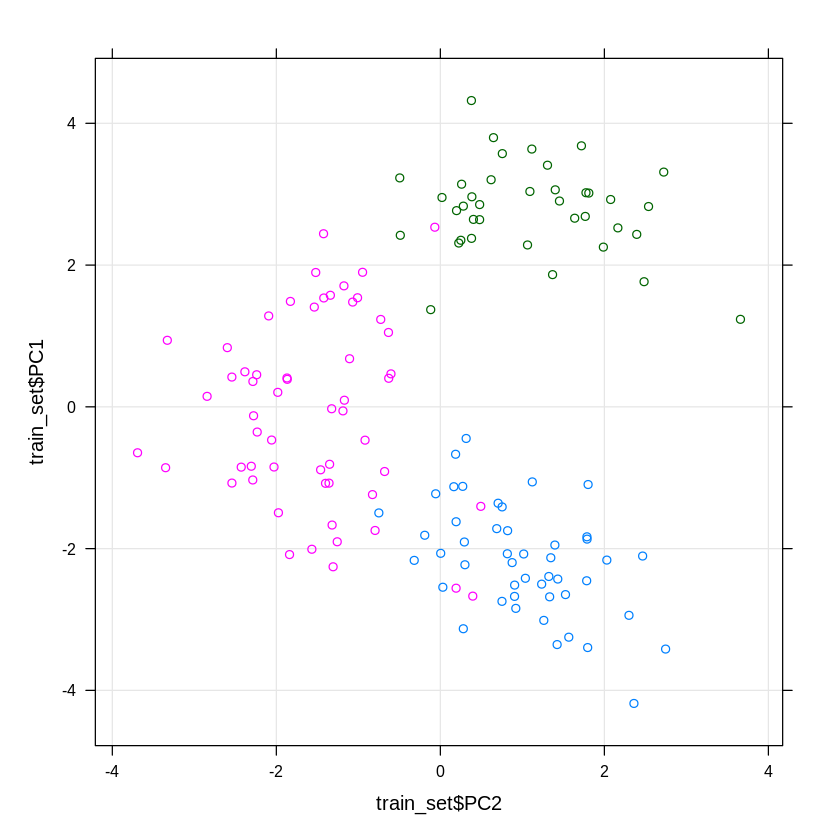

In [12]:
library(lattice)
xyplot(train_set$PC1 ~ train_set$PC2, group=train_set$Customer_Segment, grid=TRUE, asp=1)

#### **Visualising the Principal Component Train set results**

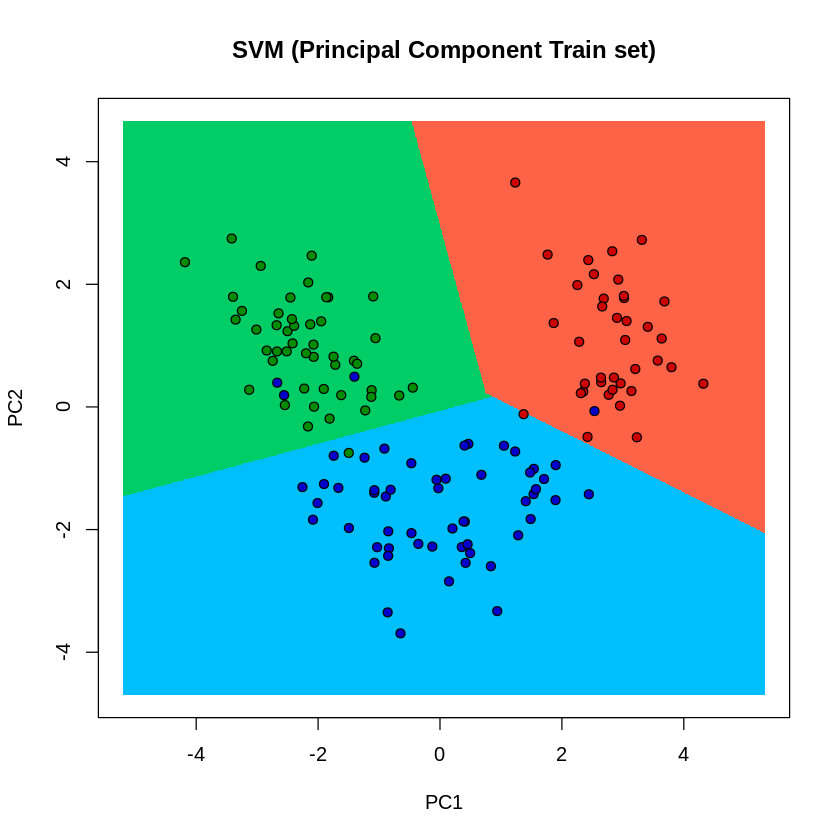

In [13]:
#library(Rfast)
set = train_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Principal Component Train set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

#### **Visualizing the Principal Component Test sets**

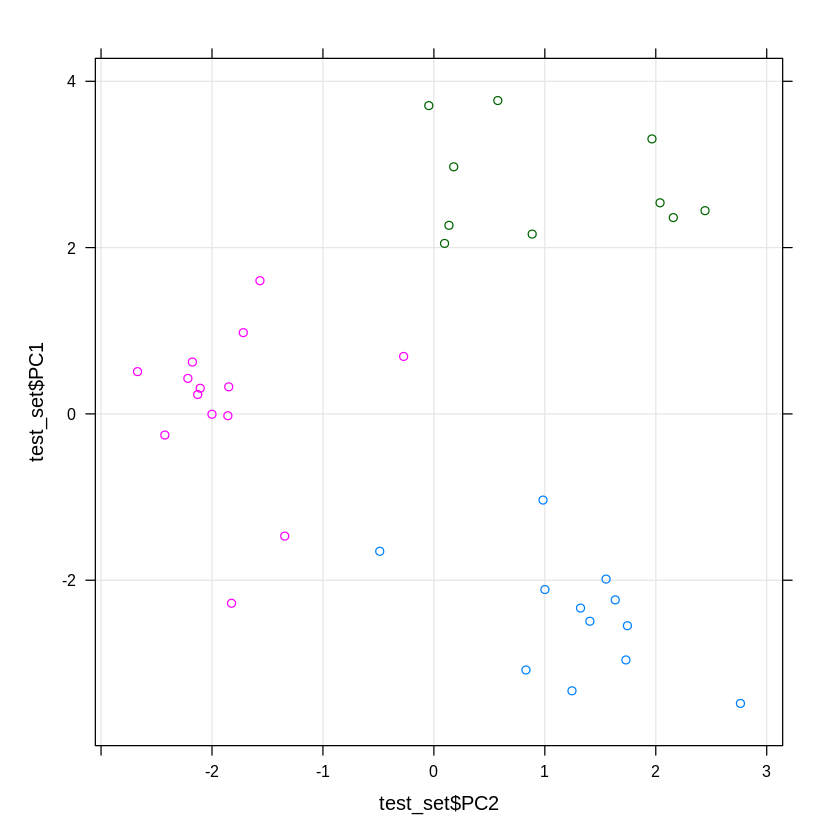

In [14]:
library(lattice)
xyplot(test_set$PC1 ~ test_set$PC2, group=test_set$Customer_Segment, grid=TRUE, asp=1)

#### **Visualizing the Principal Component Test set results**

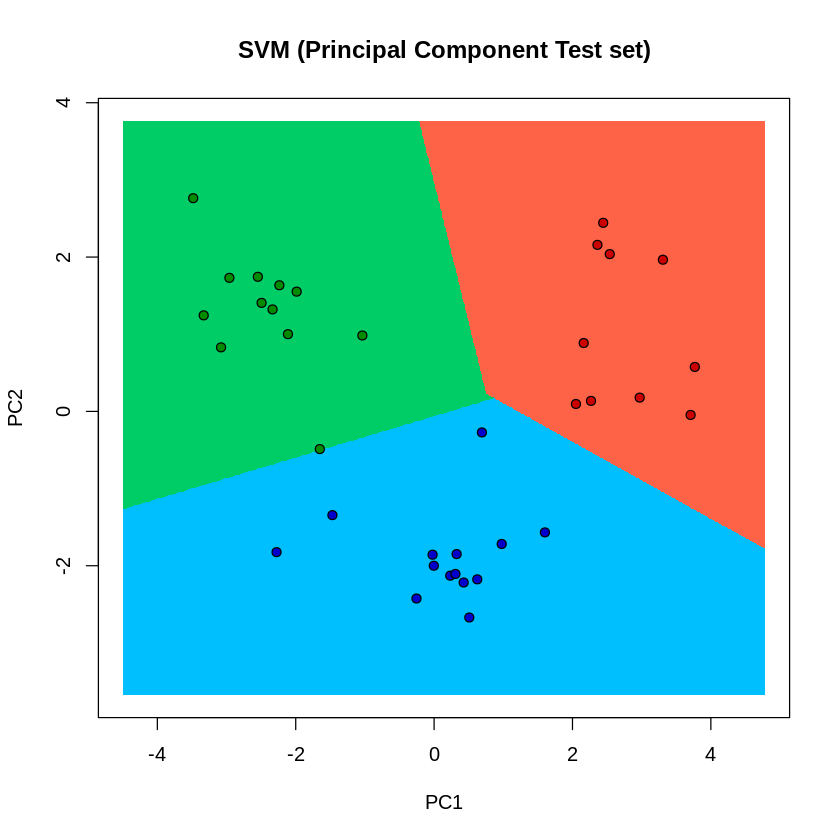

In [15]:
#library(Rfast)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM (Principal Component Test set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

### **Part 3B: Performing Linear Discriminant Analysis (LDA)**

In [16]:
#Splitting the dataset into the Train set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Customer_Segment, SplitRatio = 0.8)
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)

#Feature Scaling

train_set[-14] = scale(train_set[-14])
test_set[-14] = scale(test_set[-14])

#Implementing the LDA Model
library(MASS)
lda = lda(formula = Customer_Segment ~ ., data = train_set)
train_set = as.data.frame(predict(lda, train_set))
test_set = as.data.frame(predict(lda, test_set))
print(head(train_set))
print(head(test_set))
train_set = train_set[c(5, 6, 1)]
test_set = test_set[c(5, 6, 1)]
print(head(train_set))
print(head(test_set))

  class posterior.1  posterior.2  posterior.3     x.LD1    x.LD2
1     1   1.0000000 1.402325e-09 5.656888e-17 -4.656187 2.081444
2     1   0.9999999 1.142655e-07 5.546095e-16 -4.336729 1.267238
3     1   0.9999936 6.408747e-06 1.321058e-12 -3.292202 1.167575
6     1   1.0000000 1.901419e-11 1.858141e-16 -4.515987 3.265418
7     1   1.0000000 8.480654e-12 8.206972e-17 -4.627289 3.369602
9     1   1.0000000 2.703595e-08 1.193997e-14 -3.936469 1.967177
   class posterior.1  posterior.2  posterior.3     x.LD1    x.LD2
4      1   1.0000000 6.901624e-12 4.696904e-15 -4.092791 3.879201
5      1   0.8113902 1.886059e-01 3.890313e-06 -1.252520 0.321187
8      1   1.0000000 3.382810e-10 9.499796e-15 -3.984139 3.009815
11     1   1.0000000 1.013939e-08 7.042600e-17 -4.619335 1.623783
16     1   1.0000000 2.336029e-08 6.833553e-12 -3.097161 2.723515
20     1   0.9999998 2.368751e-07 5.948939e-13 -3.410850 1.881416
      x.LD1    x.LD2 class
1 -4.656187 2.081444     1
2 -4.336729 1.267238     1
3 

#### **Building & Training the Support Vector Classification model on the Linear Discriminant Train set**

In [17]:
# Fitting SVM to the Training set
# install.packages('e1071')
library(e1071)
classifier = svm(formula = class ~ .,
                 data = train_set,
                 type = 'C-classification',
                 kernel = 'linear')

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Evaluation Metrics
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
print(cm)
# Evaluation Metrics
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
cat("Accuracy of LDA Support Vector Classification Model is:", accuracy)  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1)

   y_pred
     1  2  3
  1 12  0  0
  2  1 13  0
  3  0  0 10
Accuracy of LDA Support Vector Classification Model is: 0.9722222

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
1,0.9230769,1.0000000,0.960000
2,1.0000000,0.9285714,0.962963
3,1.0000000,1.0000000,1.000000


#### **Visualizing the Linear Discriminant Train sets**

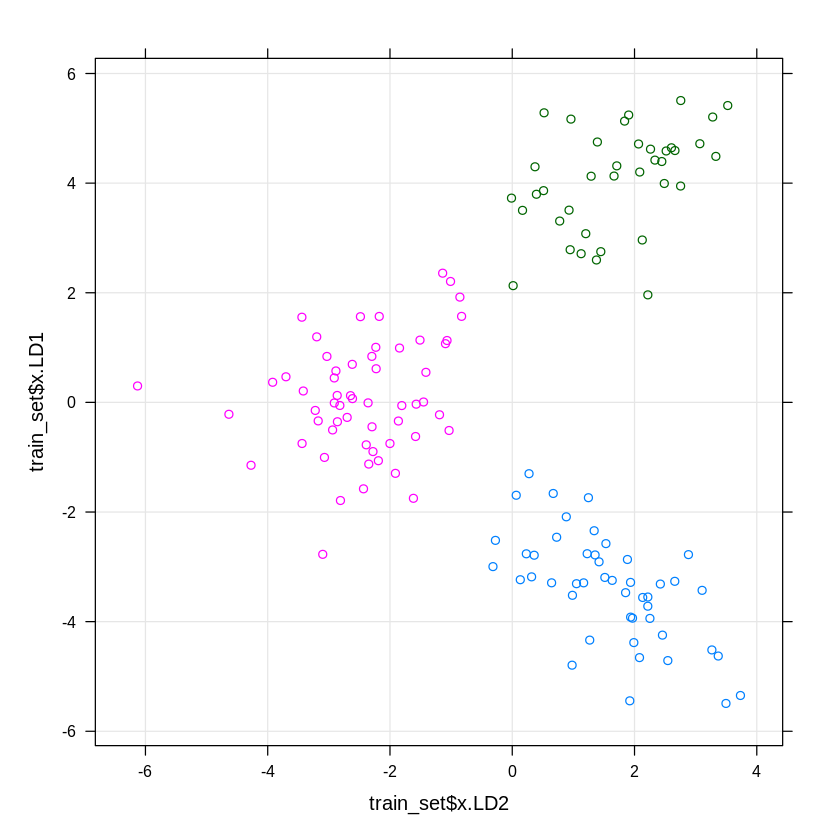

In [18]:
library(lattice)
xyplot(train_set$x.LD1 ~ train_set$x.LD2, group=train_set$class, grid=TRUE, asp=1)

#### **Visualising the Linear Discriminant Train set results**

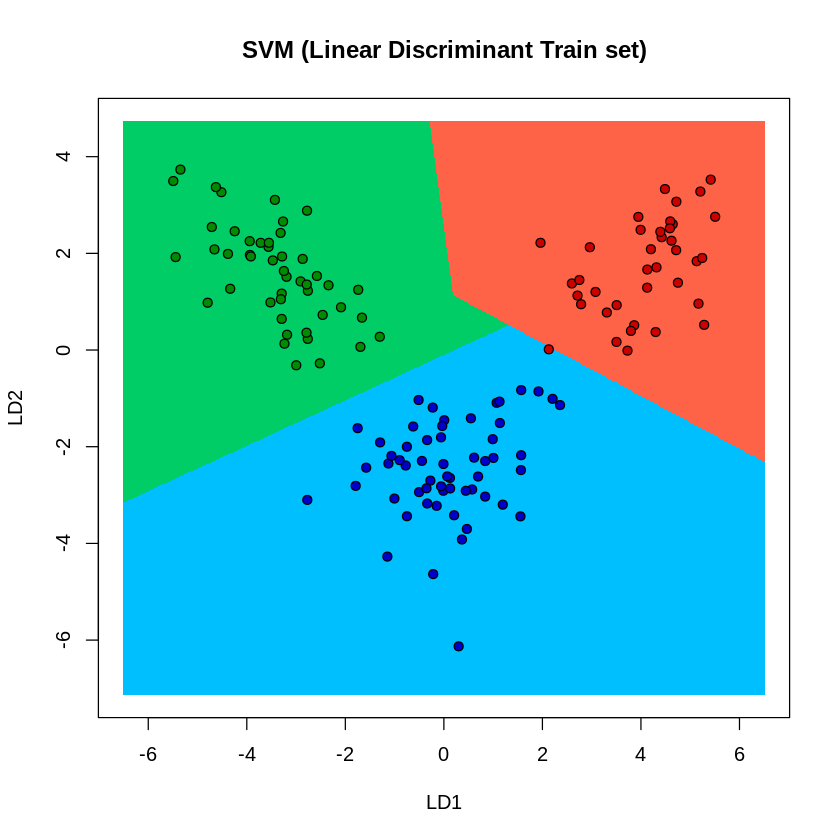

In [19]:
#library(Rfast)
set = train_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('x.LD1', 'x.LD2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Linear Discriminant Train set)',
     xlab = 'LD1', ylab = 'LD2',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

#### **Visualizing the Linear Discriminant Test sets**

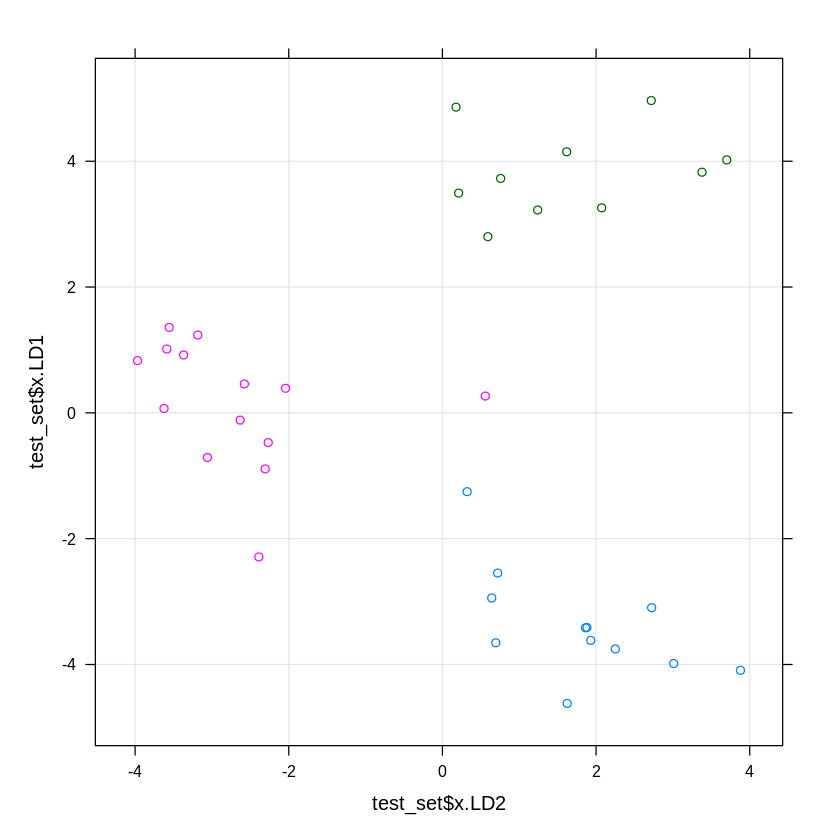

In [20]:
library(lattice)
xyplot(test_set$x.LD1 ~ test_set$x.LD2, group=test_set$class, grid=TRUE, asp=1)

#### **Visualising the Linear Discriminant Test set results**

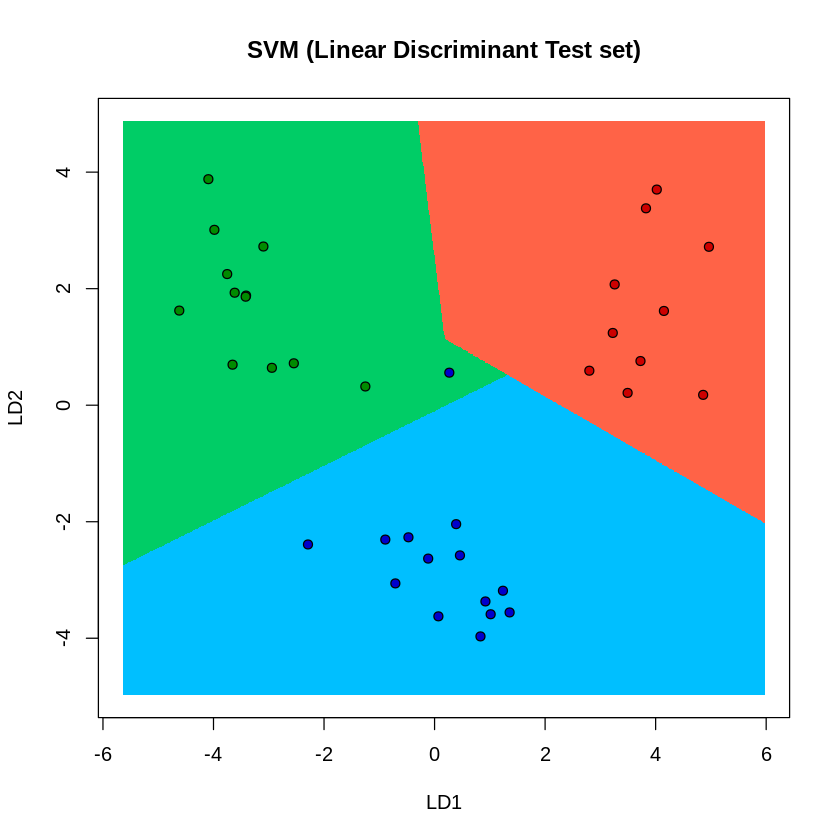

In [21]:
#library(Rfast)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('x.LD1', 'x.LD2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Linear Discriminant Test set)',
     xlab = 'LD1', ylab = 'LD2',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

### **Part 3C: Applying Quadratic Discriminant Analysis (QDA)**

In [22]:
#Splitting the dataset into the Train set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Customer_Segment, SplitRatio = 0.8)
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)

#Feature Scaling

train_set[-14] = scale(train_set[-14])
test_set[-14] = scale(test_set[-14])

#Implementing QDA model
library(MASS)
qda = qda(formula = Customer_Segment ~ ., data = train_set)
#view model output
qda

Call:
qda(Customer_Segment ~ ., data = train_set)

Prior probabilities of groups:
        1         2         3 
0.3309859 0.4014085 0.2676056 

Group means:
     Alcohol Malic_Acid        Ash Ash_Alkanity   Magnesium Total_Phenols
1  0.9143669 -0.2653910  0.2740102   -0.7453247  0.39009710    0.83200023
2 -0.8840575 -0.3061728 -0.3932170    0.2259393 -0.28508911   -0.05219252
3  0.1951587  0.7875060  0.2509182    0.5829401 -0.05485487   -0.95076414
   Flavanoids Nonflavanoid_Phenols Proanthocyanins Color_Intensity        Hue
1  0.92305929          -0.53991068      0.51457195       0.1510230  0.4555166
2  0.07478132          -0.07175223      0.08097814      -0.8332685  0.4330377
3 -1.25385058           0.77541260     -0.75791146       1.0631113 -1.2129587
       OD280    Proline
1  0.7628428  1.1685484
2  0.2339286 -0.7100428
3 -1.2944091 -0.3802457

Here is how to interpret the output of the model:

**Prior probabilities of group:** These represent the proportions of each Species in the training set. For example, 33% of all observations in the training set were of Customer_Segment 1, 40% were from Customer_Segment 2 and 26.8% from Customer_Segment 3.

**Group means:** These display the mean values for each predictor variable for each Customer_Segment.

In [23]:
train_set = as.data.frame(predict(qda, train_set))
test_set = as.data.frame(predict(qda, test_set))
print(head(train_set))
print(head(test_set))

  class posterior.1  posterior.2   posterior.3
1     1           1 3.514664e-17 1.916136e-101
2     1           1 1.270241e-12  1.629457e-89
3     1           1 1.252253e-10 7.261597e-104
6     1           1 4.322391e-21 1.840198e-128
7     1           1 1.044064e-21  1.770213e-86
9     1           1 5.433298e-14  8.663037e-92
   class posterior.1  posterior.2   posterior.3
4      1   1.0000000 2.641202e-23 2.712088e-127
5      1   0.9999324 6.757220e-05  2.203820e-49
8      1   1.0000000 6.082224e-17  5.127483e-73
11     1   1.0000000 1.380154e-13 7.456489e-119
16     1   1.0000000 1.013264e-12  3.028619e-80
20     1   1.0000000 2.872652e-10  9.648132e-79


In [24]:
train_set = train_set[c(2, 3, 1)]
test_set = test_set[c(2, 3, 1)]
print(head(train_set))
print(head(test_set))

  posterior.1  posterior.2 class
1           1 3.514664e-17     1
2           1 1.270241e-12     1
3           1 1.252253e-10     1
6           1 4.322391e-21     1
7           1 1.044064e-21     1
9           1 5.433298e-14     1
   posterior.1  posterior.2 class
4    1.0000000 2.641202e-23     1
5    0.9999324 6.757220e-05     1
8    1.0000000 6.082224e-17     1
11   1.0000000 1.380154e-13     1
16   1.0000000 1.013264e-12     1
20   1.0000000 2.872652e-10     1


#### **Building & Training the Support Vector Classification model on the Quadratic Discriminant Train set**

In [25]:
# Fitting SVM to the Training set
# install.packages('e1071')
library(e1071)
classifier = svm(formula = class ~ .,
                 data = train_set,
                 type = 'C-classification',
                 kernel = 'linear')

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Evaluation Metrics
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
print(cm)
# Evaluation Metrics
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
cat("Accuracy of QDA Support Vector Classification Model is:", accuracy)  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1)

   y_pred
     1  2  3
  1 12  0  0
  2  0 14  0
  3  0  0 10
Accuracy of QDA Support Vector Classification Model is: 1

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
1,1,1,1
2,1,1,1
3,1,1,1


### **Part 3D: Performing Kernel Principal Component Analysis (KPCA)**

In [26]:
#Splitting the dataset into the Train set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Customer_Segment, SplitRatio = 0.8)
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)

#Feature Scaling

train_set[-14] = scale(train_set[-14])
test_set[-14] = scale(test_set[-14])
install.packages('kernlab')
library(kernlab)
kpca = kpca(~., data = train_set[-14], kernel = 'rbfdot', features = 2)
train_set_kpca = as.data.frame(predict(kpca, train_set))
train_set_kpca$Customer_Segment = train_set$Customer_Segment
test_set_kpca = as.data.frame(predict(kpca, test_set))
test_set_kpca$Customer_Segment = test_set$Customer_Segment
print(head(train_set_kpca))
print(head(test_set_kpca))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha




         V1         V2 Customer_Segment
1 -5.218564 -3.4365540                1
2 -4.403133 -0.4038516                1
3 -4.990037 -2.3313836                1
6 -5.799060 -4.5230929                1
7 -6.184512 -3.4630708                1
9 -5.472144 -2.8744757                1
          V1         V2 Customer_Segment
4  -4.303080 -3.6559380                1
5  -2.458630 -0.7861315                1
8  -5.199408 -3.2622191                1
11 -6.080585 -3.6294638                1
16 -5.490224 -3.5390926                1
20 -4.660438 -2.0671120                1


#### **Building & Training the Support Vector Classification model on the Kernel Principal Component Train set**

In [27]:
# Fitting SVM to the Training set
# install.packages('e1071')
library(e1071)
classifier = svm(formula = Customer_Segment ~ .,
                 data = train_set_kpca,
                 type = 'C-classification',
                 kernel = 'linear')

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set_kpca[-3])

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Evaluation Metrics
# Making the Confusion Matrix
cm = table(test_set_kpca[, 3], y_pred)
print(cm)
# Evaluation Metrics
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
cat("Accuracy of KPCA Support Vector Classification Model is:", accuracy)  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1)

   y_pred
     1  2  3
  1 12  0  0
  2  0 14  0
  3  0  0 10
Accuracy of KPCA Support Vector Classification Model is: 1

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
1,1,1,1
2,1,1,1
3,1,1,1


#### **Visualizing the Kernel Principal Component Train sets**

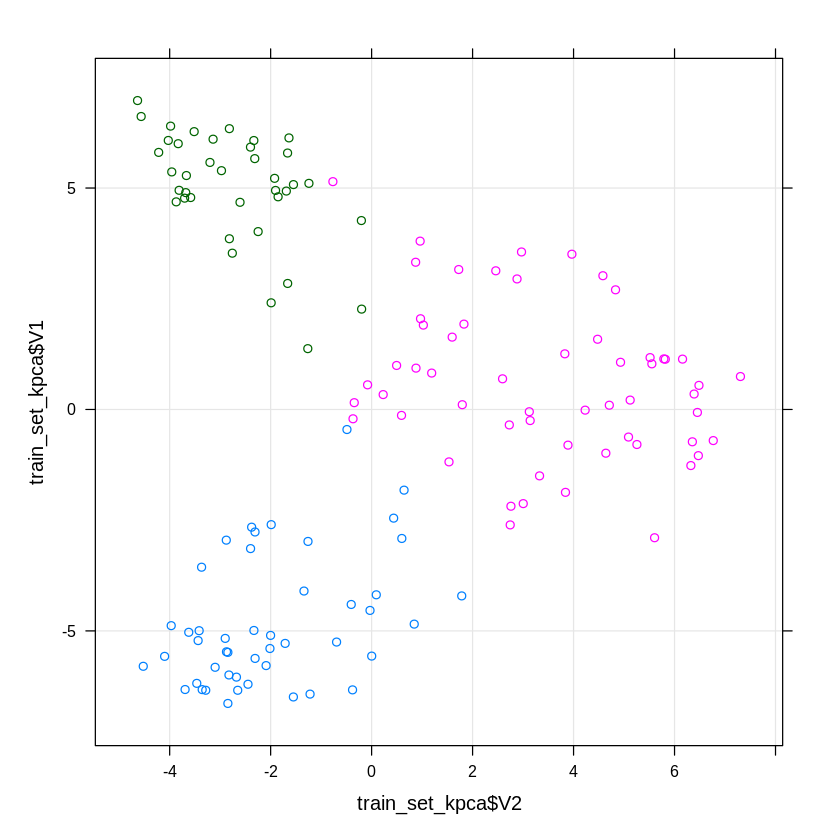

In [28]:
library(lattice)
xyplot(train_set_kpca$V1 ~ train_set_kpca$V2, group=train_set$Customer_Segment, grid=TRUE, asp=1)

#### **Visualising the Kernel Principal Component Train set results**

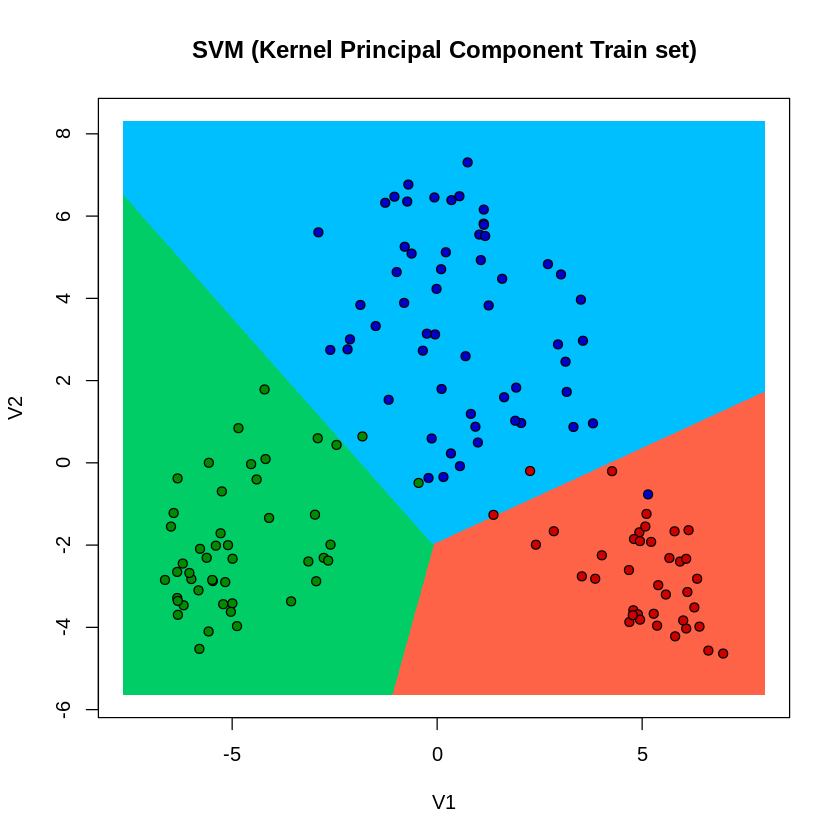

In [29]:
#library(Rfast)
set = train_set_kpca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('V1', 'V2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Kernel Principal Component Train set)',
     xlab = 'V1', ylab = 'V2',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

#### **Visualizing the Kernel Principal Component Test sets**

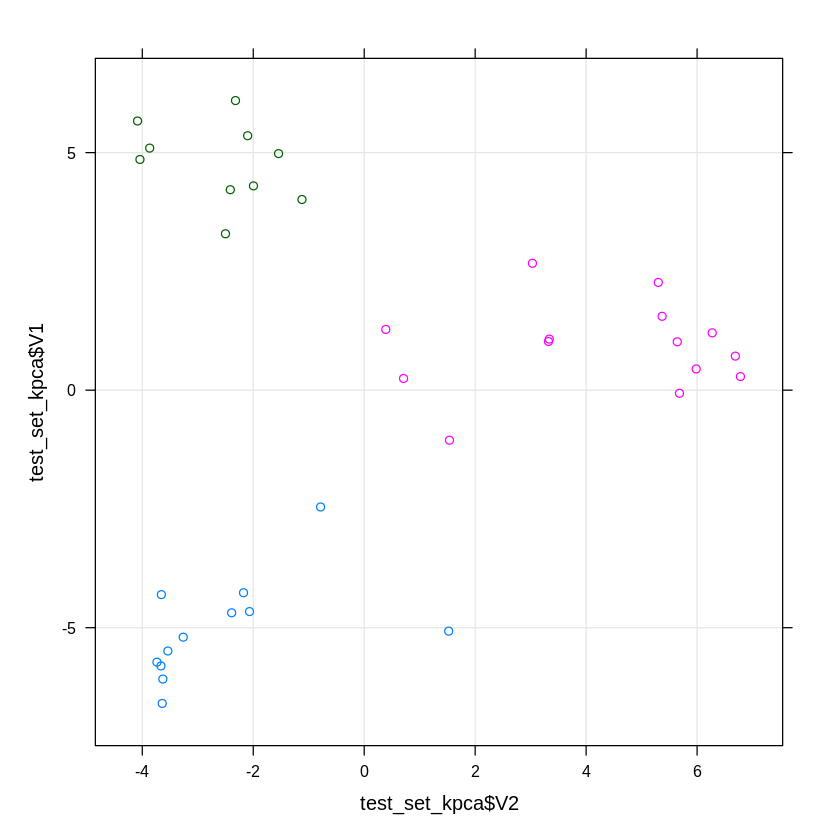

In [30]:
library(lattice)
xyplot(test_set_kpca$V1 ~ test_set_kpca$V2, group=test_set$Customer_Segment, grid=TRUE, asp=1)

#### **Visualising the Kernel Principal Component Test set results**

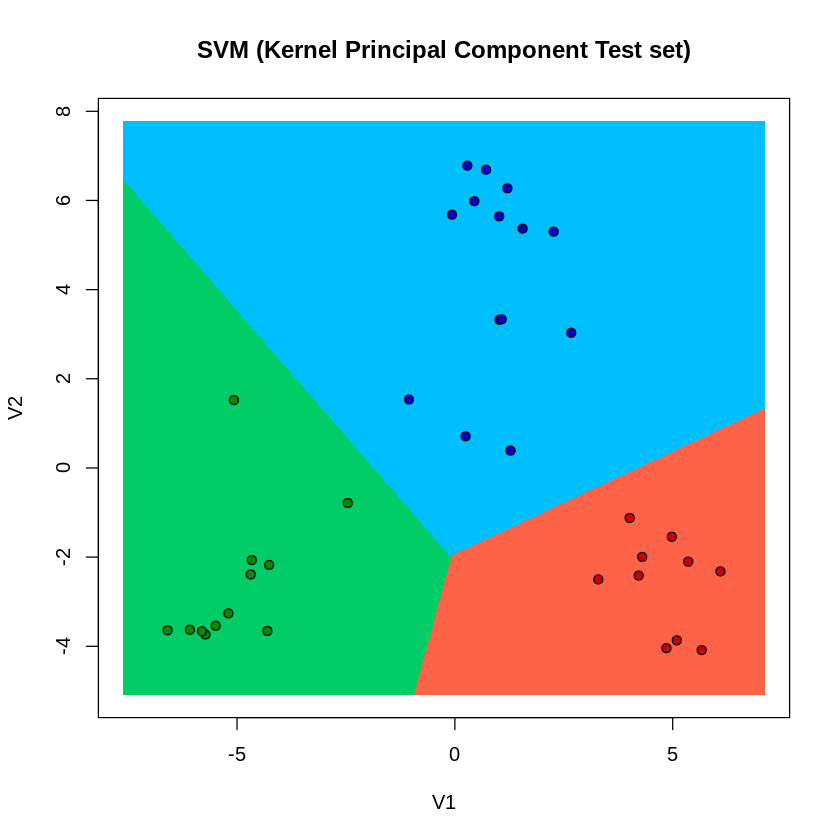

In [31]:
#library(Rfast)
set = test_set_kpca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('V1', 'V2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Kernel Principal Component Test set)',
     xlab = 'V1', ylab = 'V2',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))